In [1]:
import pandas as pd
import numpy as np


In [4]:
ldr_discography_released_df = pd.read_csv(r'C:\Users\user\Desktop\ldr_discography\ldr_discography_released.csv')

In [14]:
ldr_discography_released_df.info

<bound method DataFrame.info of                               album_title  \
0                          Blue Banisters   
1                          Blue Banisters   
2                          Blue Banisters   
3                          Blue Banisters   
4                          Blue Banisters   
..                                    ...   
191  Violet Bent Backwards Over the Grass   
192  Violet Bent Backwards Over the Grass   
193  Violet Bent Backwards Over the Grass   
194  Violet Bent Backwards Over the Grass   
195  Violet Bent Backwards Over the Grass   

                                             album_url  \
0    https://genius.com/albums/Lana-Del-Rey/Blue-Ba...   
1    https://genius.com/albums/Lana-Del-Rey/Blue-Ba...   
2    https://genius.com/albums/Lana-Del-Rey/Blue-Ba...   
3    https://genius.com/albums/Lana-Del-Rey/Blue-Ba...   
4    https://genius.com/albums/Lana-Del-Rey/Blue-Ba...   
..                                                 ...   
191  https://genius.c

In [15]:
ldr_discography_released_df.describe()

,album_track_number,song_page_views
count,196.000000,1.960000e+02
mean,7.265306,3.436179e+05
std,4.912675,3.698775e+05
min,0.000000,0.000000e+00
25%,3.000000,6.007500e+04
50%,7.000000,2.374000e+05
75%,11.000000,4.471500e+05
max,23.000000,2.000000e+06


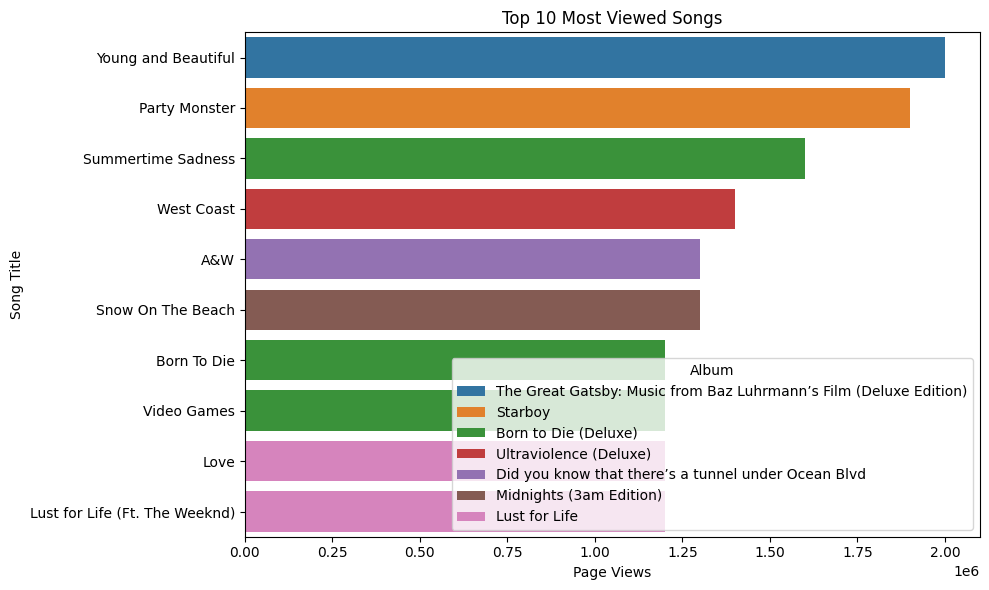

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

top_songs = ldr_discography_released_df.nlargest(10, 'song_page_views')

plt.figure(figsize=(10, 6))
sns.barplot(data=top_songs, x='song_page_views', y='song_title', hue='album_title', dodge=False)
plt.title('Top 10 Most Viewed Songs')
plt.xlabel('Page Views')
plt.ylabel('Song Title')
plt.legend(title='Album', loc='lower right')
plt.tight_layout()
plt.show()


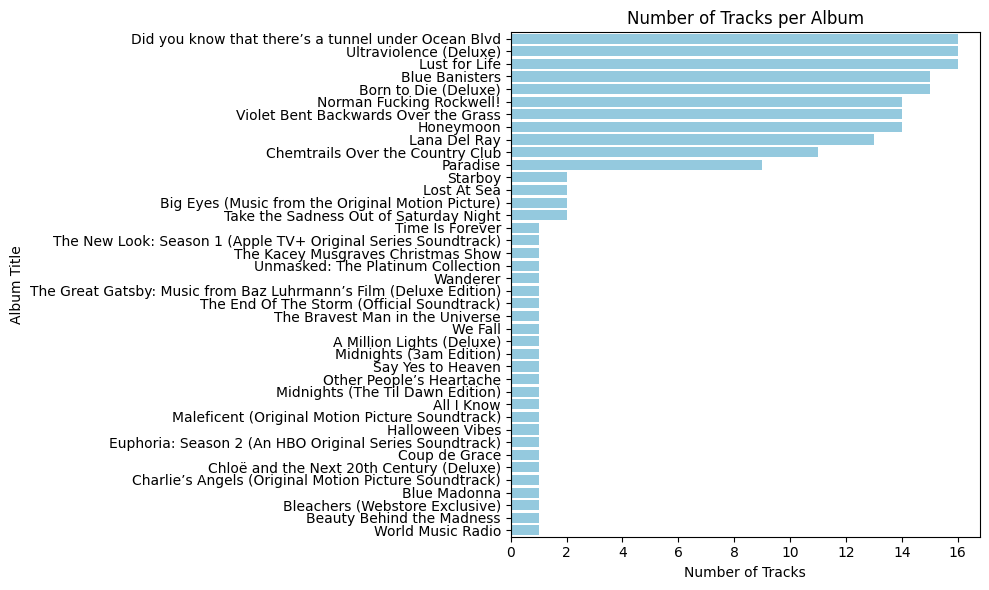

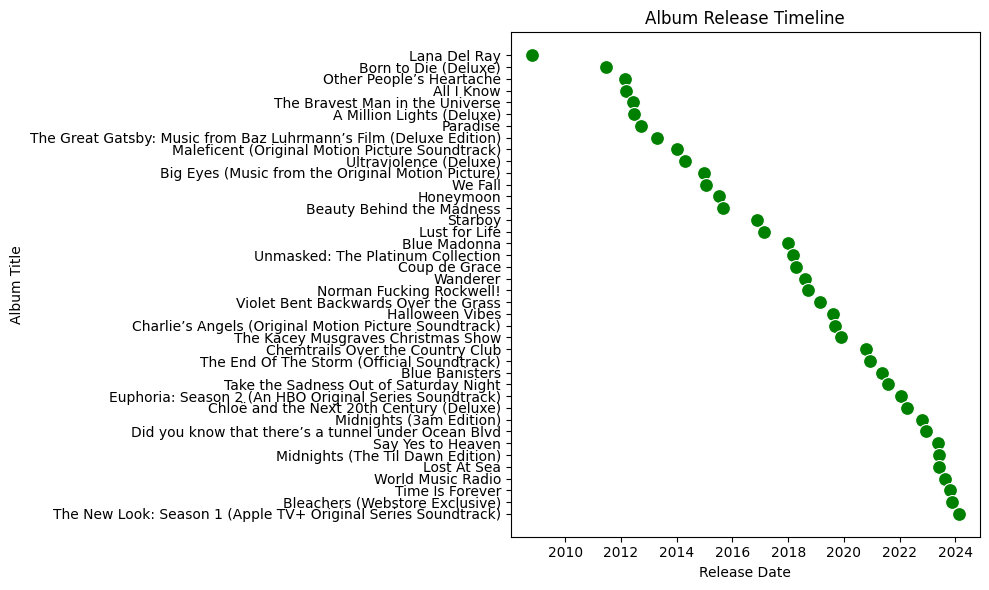

In [20]:

ldr_discography_released_df['song_release_date'] = pd.to_datetime(ldr_discography_released_df['song_release_date'])

album_tracks = ldr_discography_released_df.groupby('album_title')['song_title'].count().reset_index().sort_values(by='song_title', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=album_tracks, x='song_title', y='album_title', color='skyblue')
plt.title('Number of Tracks per Album')
plt.xlabel('Number of Tracks')
plt.ylabel('Album Title')
plt.tight_layout()
plt.show()


album_release_dates = ldr_discography_released_df.groupby('album_title')['song_release_date'].min().reset_index().sort_values(by='song_release_date')

plt.figure(figsize=(10, 6))
sns.scatterplot(data=album_release_dates, x='song_release_date', y='album_title', color='green', s=100)
plt.title('Album Release Timeline')
plt.xlabel('Release Date')
plt.ylabel('Album Title')
plt.tight_layout()
plt.show()


In [ ]:
Plot the release dates of songs to observe Lana Del Rey's activity over time.

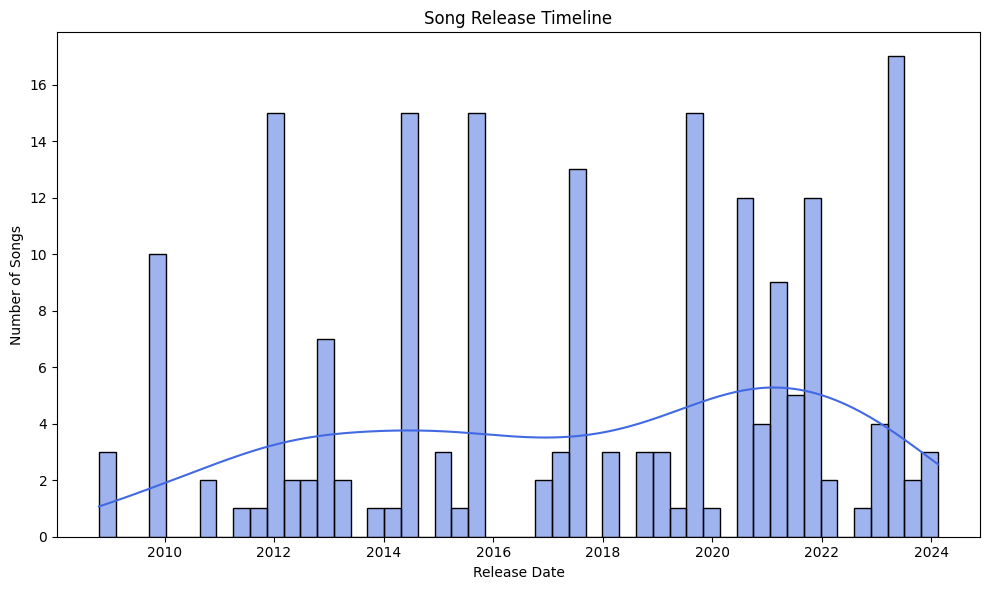

In [23]:

ldr_discography_released_df['song_release_date'] = pd.to_datetime(ldr_discography_released_df['song_release_date'])

# Plotting the Song Release Timeline
plt.figure(figsize=(10, 6))
sns.histplot(ldr_discography_released_df['song_release_date'], bins=50, color='royalblue', kde=True)
plt.title('Song Release Timeline')
plt.xlabel('Release Date')
plt.ylabel('Number of Songs')
plt.tight_layout()
plt.show()


In [ ]:
Identify and visualize collaborations based on song writers and producers.

In [24]:
import networkx as nx
import matplotlib.pyplot as plt


In [26]:
def build_collaboration_network(collaborators):
    """
    Builds a network graph from a list of collaborator lists.
    """
    G = nx.Graph()
    for collaboration in collaborators:
        # Assuming collaboration is already a proper list; adjust parsing as needed
        for i in range(len(collaboration)):
            for j in range(i+1, len(collaboration)):
                if G.has_edge(collaboration[i], collaboration[j]):
                    G[collaboration[i]][collaboration[j]]['weight'] += 1
                else:
                    G.add_edge(collaboration[i], collaboration[j], weight=1)
    return G

# Example usage with song writers
collaboration_network = build_collaboration_network(ldr_discography_released_df['song_writers'].tolist())


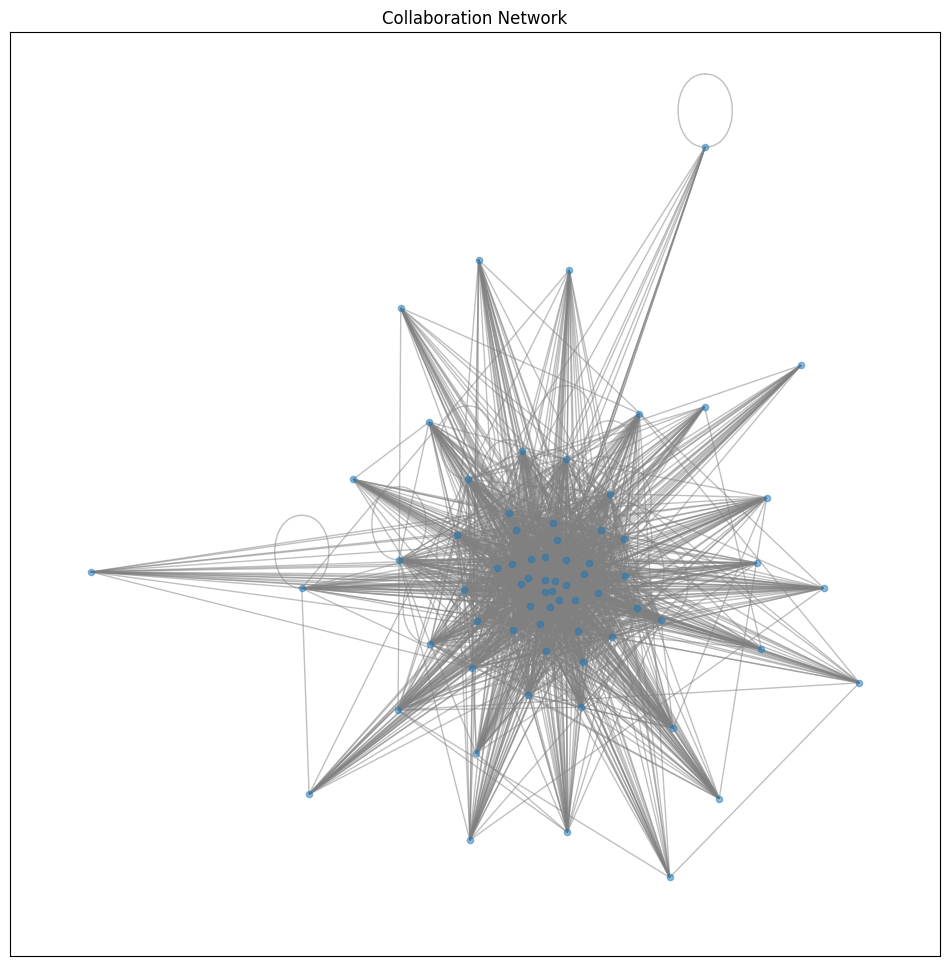

In [27]:
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(collaboration_network, k=0.5, iterations=20)
nx.draw_networkx(collaboration_network, pos, node_size=20, edge_color='gray', alpha=0.5, with_labels=False)
plt.title('Collaboration Network')
plt.show()


 Generate word clouds from the song lyrics to identify common themes and words.

In [28]:
pip install wordcloud matplotlib


   ---------------------------------------- 0.0/301.4 kB ? eta -:--:--
   ---------------------------------------- 0.0/301.4 kB ? eta -:--:--
   - -------------------------------------- 10.2/301.4 kB ? eta -:--:--
   --- ----------------------------------- 30.7/301.4 kB 217.9 kB/s eta 0:00:02
   ----- --------------------------------- 41.0/301.4 kB 245.8 kB/s eta 0:00:02
   ----------- --------------------------- 92.2/301.4 kB 476.3 kB/s eta 0:00:01
   ------------------ ------------------- 143.4/301.4 kB 607.9 kB/s eta 0:00:01
   ---------------------------- --------- 225.3/301.4 kB 808.4 kB/s eta 0:00:01
   -------------------------------------  297.0/301.4 kB 916.0 kB/s eta 0:00:01
   -------------------------------------- 301.4/301.4 kB 887.7 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [30]:
from wordcloud import WordCloud, STOPWORDS
# Combining all lyrics into a single string
all_lyrics = ' '.join(ldr_discography_released_df['song_lyrics'].dropna())

# Optionally, you can add more stopwords to the default list
stopwords = set(STOPWORDS)
additional_stopwords = {'like', 'just', 'don', 've', 'll', 's', 't', 'm'}
stopwords = stopwords.union(additional_stopwords)


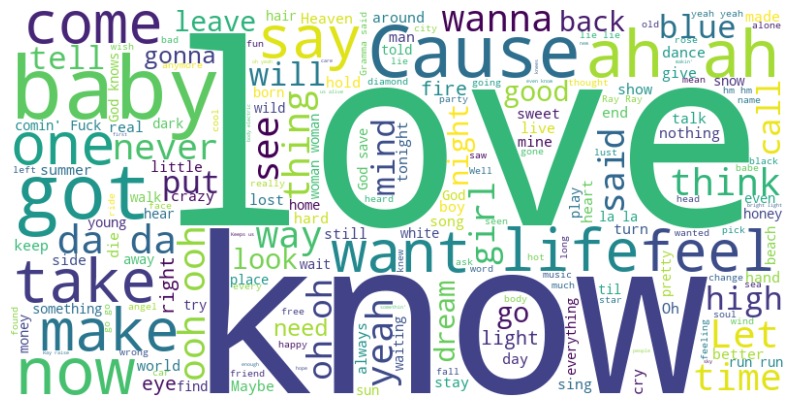

In [31]:
# Generate the word cloud
wordcloud = WordCloud(stopwords=stopwords, background_color='white', width=800, height=400).generate(all_lyrics)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide the axes
plt.show()


In [32]:
pip install pandas matplotlib seaborn


Note: you may need to restart the kernel to use updated packages.


In [33]:
from itertools import chain
from collections import Counter

In [34]:
# Assuming the column containing tags is named 'song_tags'
# Convert string representations of lists into actual lists if necessary
# Here, we're assuming tags are already in an interpretable list format directly in the dataframe

# Flatten the list of tags
all_tags = list(chain.from_iterable(ldr_discography_released_df['song_tags']))

# Count the frequency of each tag
tag_counts = Counter(all_tags)


In [35]:
tags_df = pd.DataFrame(tag_counts.items(), columns=['Tag', 'Frequency']).sort_values(by='Frequency', ascending=False)


C:\Users\user\AppData\Local\Temp\ipykernel_10092\1825106744.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Tag', data=tags_df.head(top_n), palette='viridis');


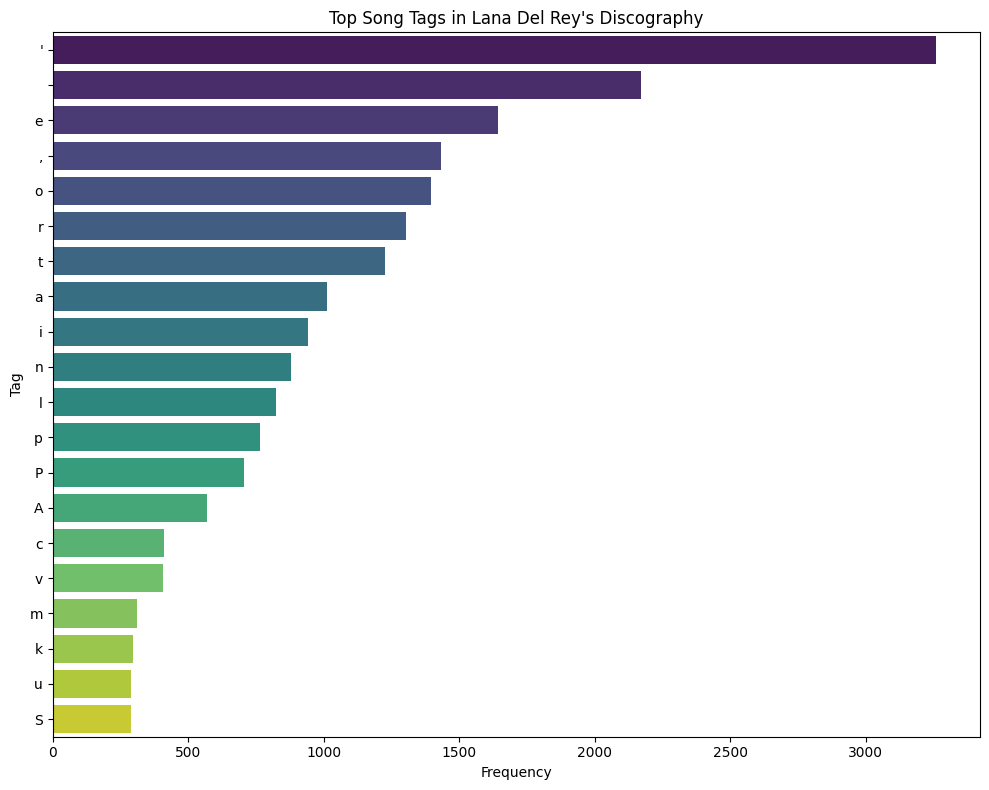

In [38]:
# Visualize the top N tags for clarity
top_n = 20
plt.figure(figsize=(10, 8));
sns.barplot(x='Frequency', y='Tag', data=tags_df.head(top_n), palette='viridis');
plt.title('Top Song Tags in Lana Del Rey\'s Discography');
plt.xlabel('Frequency');
plt.ylabel('Tag');
plt.tight_layout();
plt.show();
